# Figures

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 500
plt.rcParams['font.family'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
BLUE = '#2878B5'
LIGHTBLUE = '#9AC9DB'
ORANGE = '#F8AC8C'
RED = '#C82423'
PINK = '#FF8884'
GREY = '#9E9E9E'
DEEPGREEN = '#32B897'
GREEN = '#96CCCB'

In [ ]:
from calculator import ERCalculator
cal = ERCalculator()

import pandas as pd
cltc_p = pd.read_csv("cycles/CLTC-P-2019.csv")

brake_params = {
    "prop_NAO_f": 1/3,
    "prop_LM_f": 1/3,
    "prop_SM_f": 1/3,
    "prop_NAO_r": 1/3,
    "prop_LM_r": 1/3,
    "prop_SM_r": 1/3,
    "prop_drum_f": 0,
    "prop_drum_r": 0,
    "r_f_ratio": 0.5,
    "drum_disc_ratio": 0.3
}            
cycle_p, OpModesInfo_p, BWP_dict_p = cal.calCycleBWP(cltc_p, cltc_p.columns[0], cltc_p.columns[1], **brake_params)

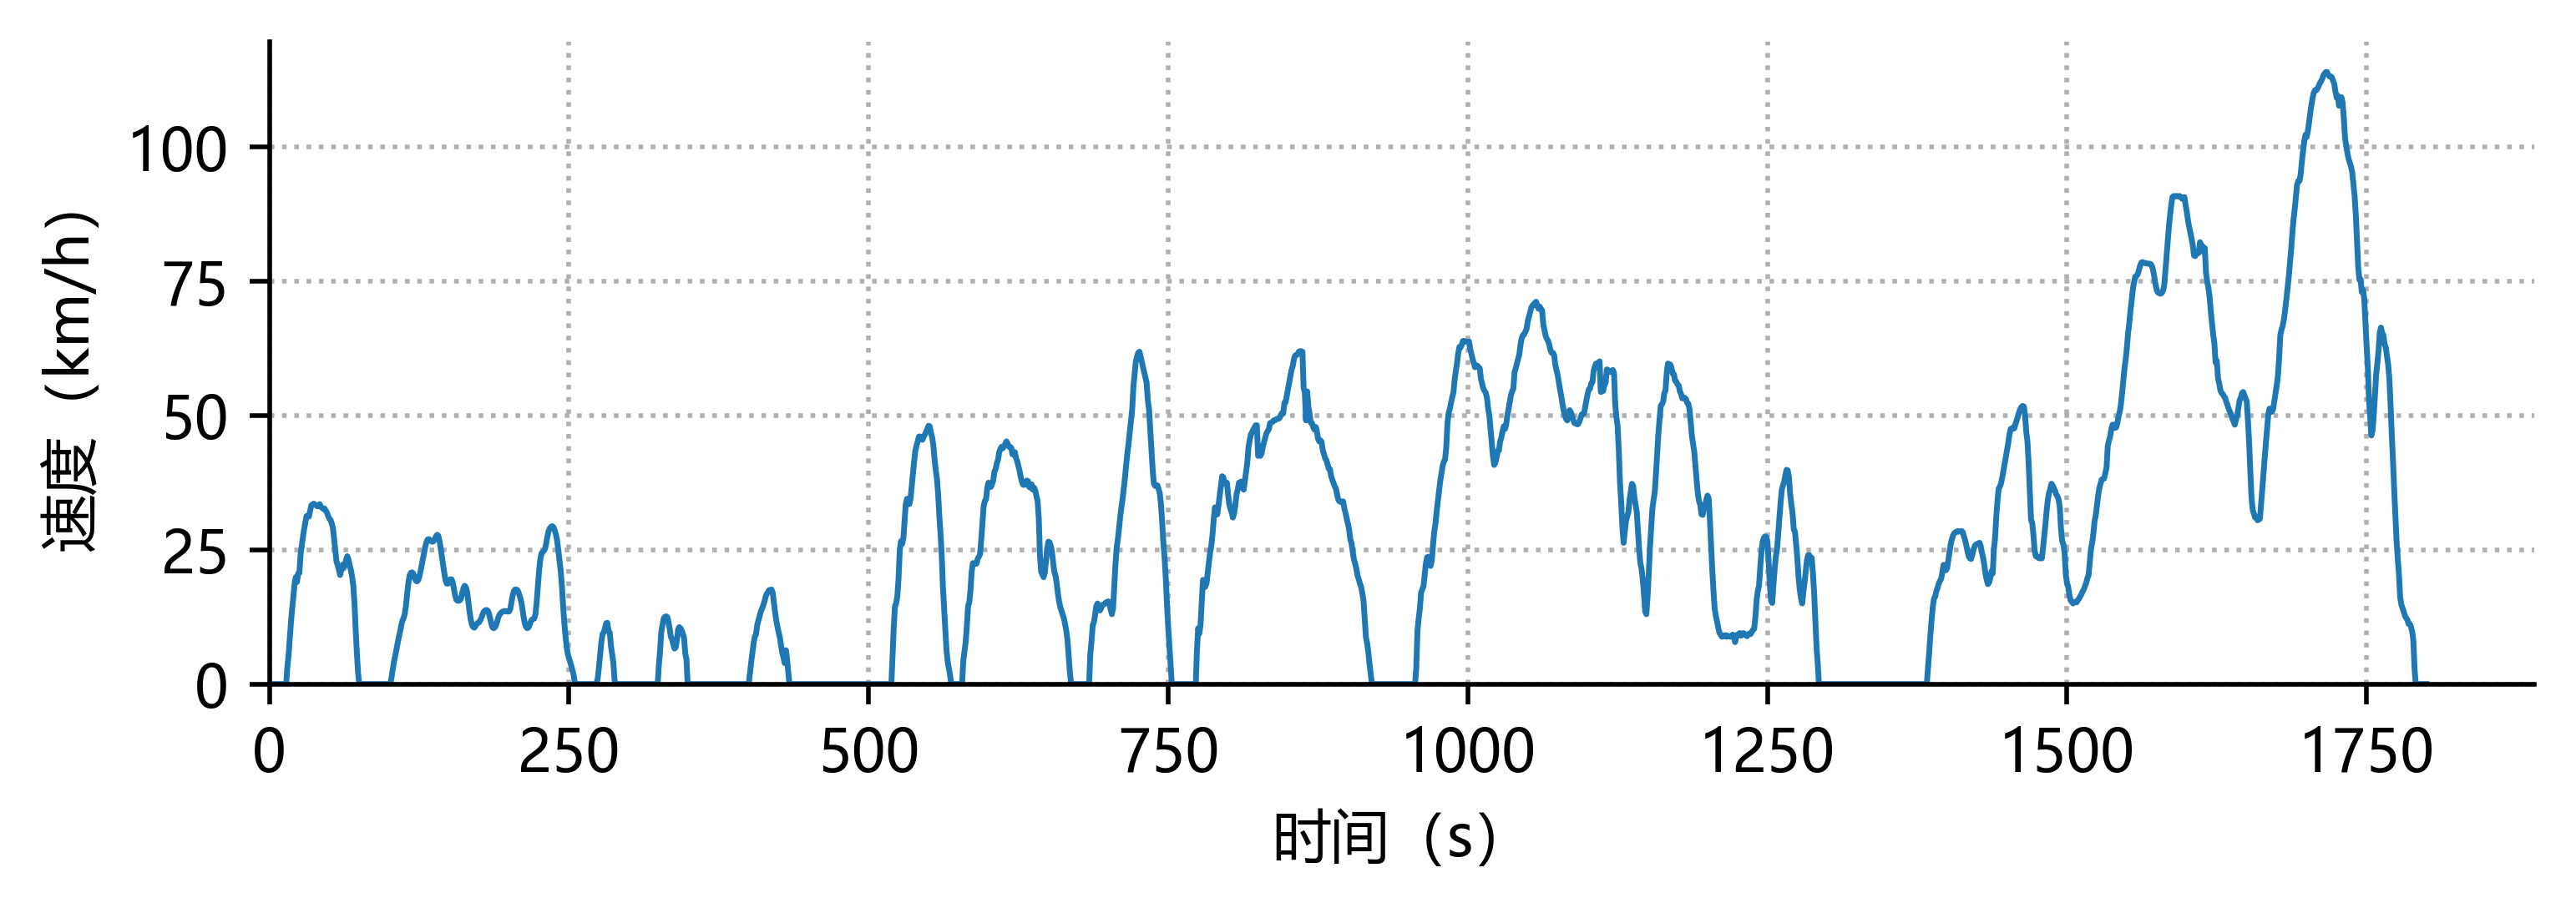

In [10]:
fig, ax = plt.subplots(figsize=(7,2))

ax.plot(cltc_p['Time/(s)'], cltc_p['Speed/(km/h)'], linewidth=1)
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.set_xlabel('时间（s）')
ax.set_ylabel('速度（km/h）')
ax.grid(linestyle=":")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

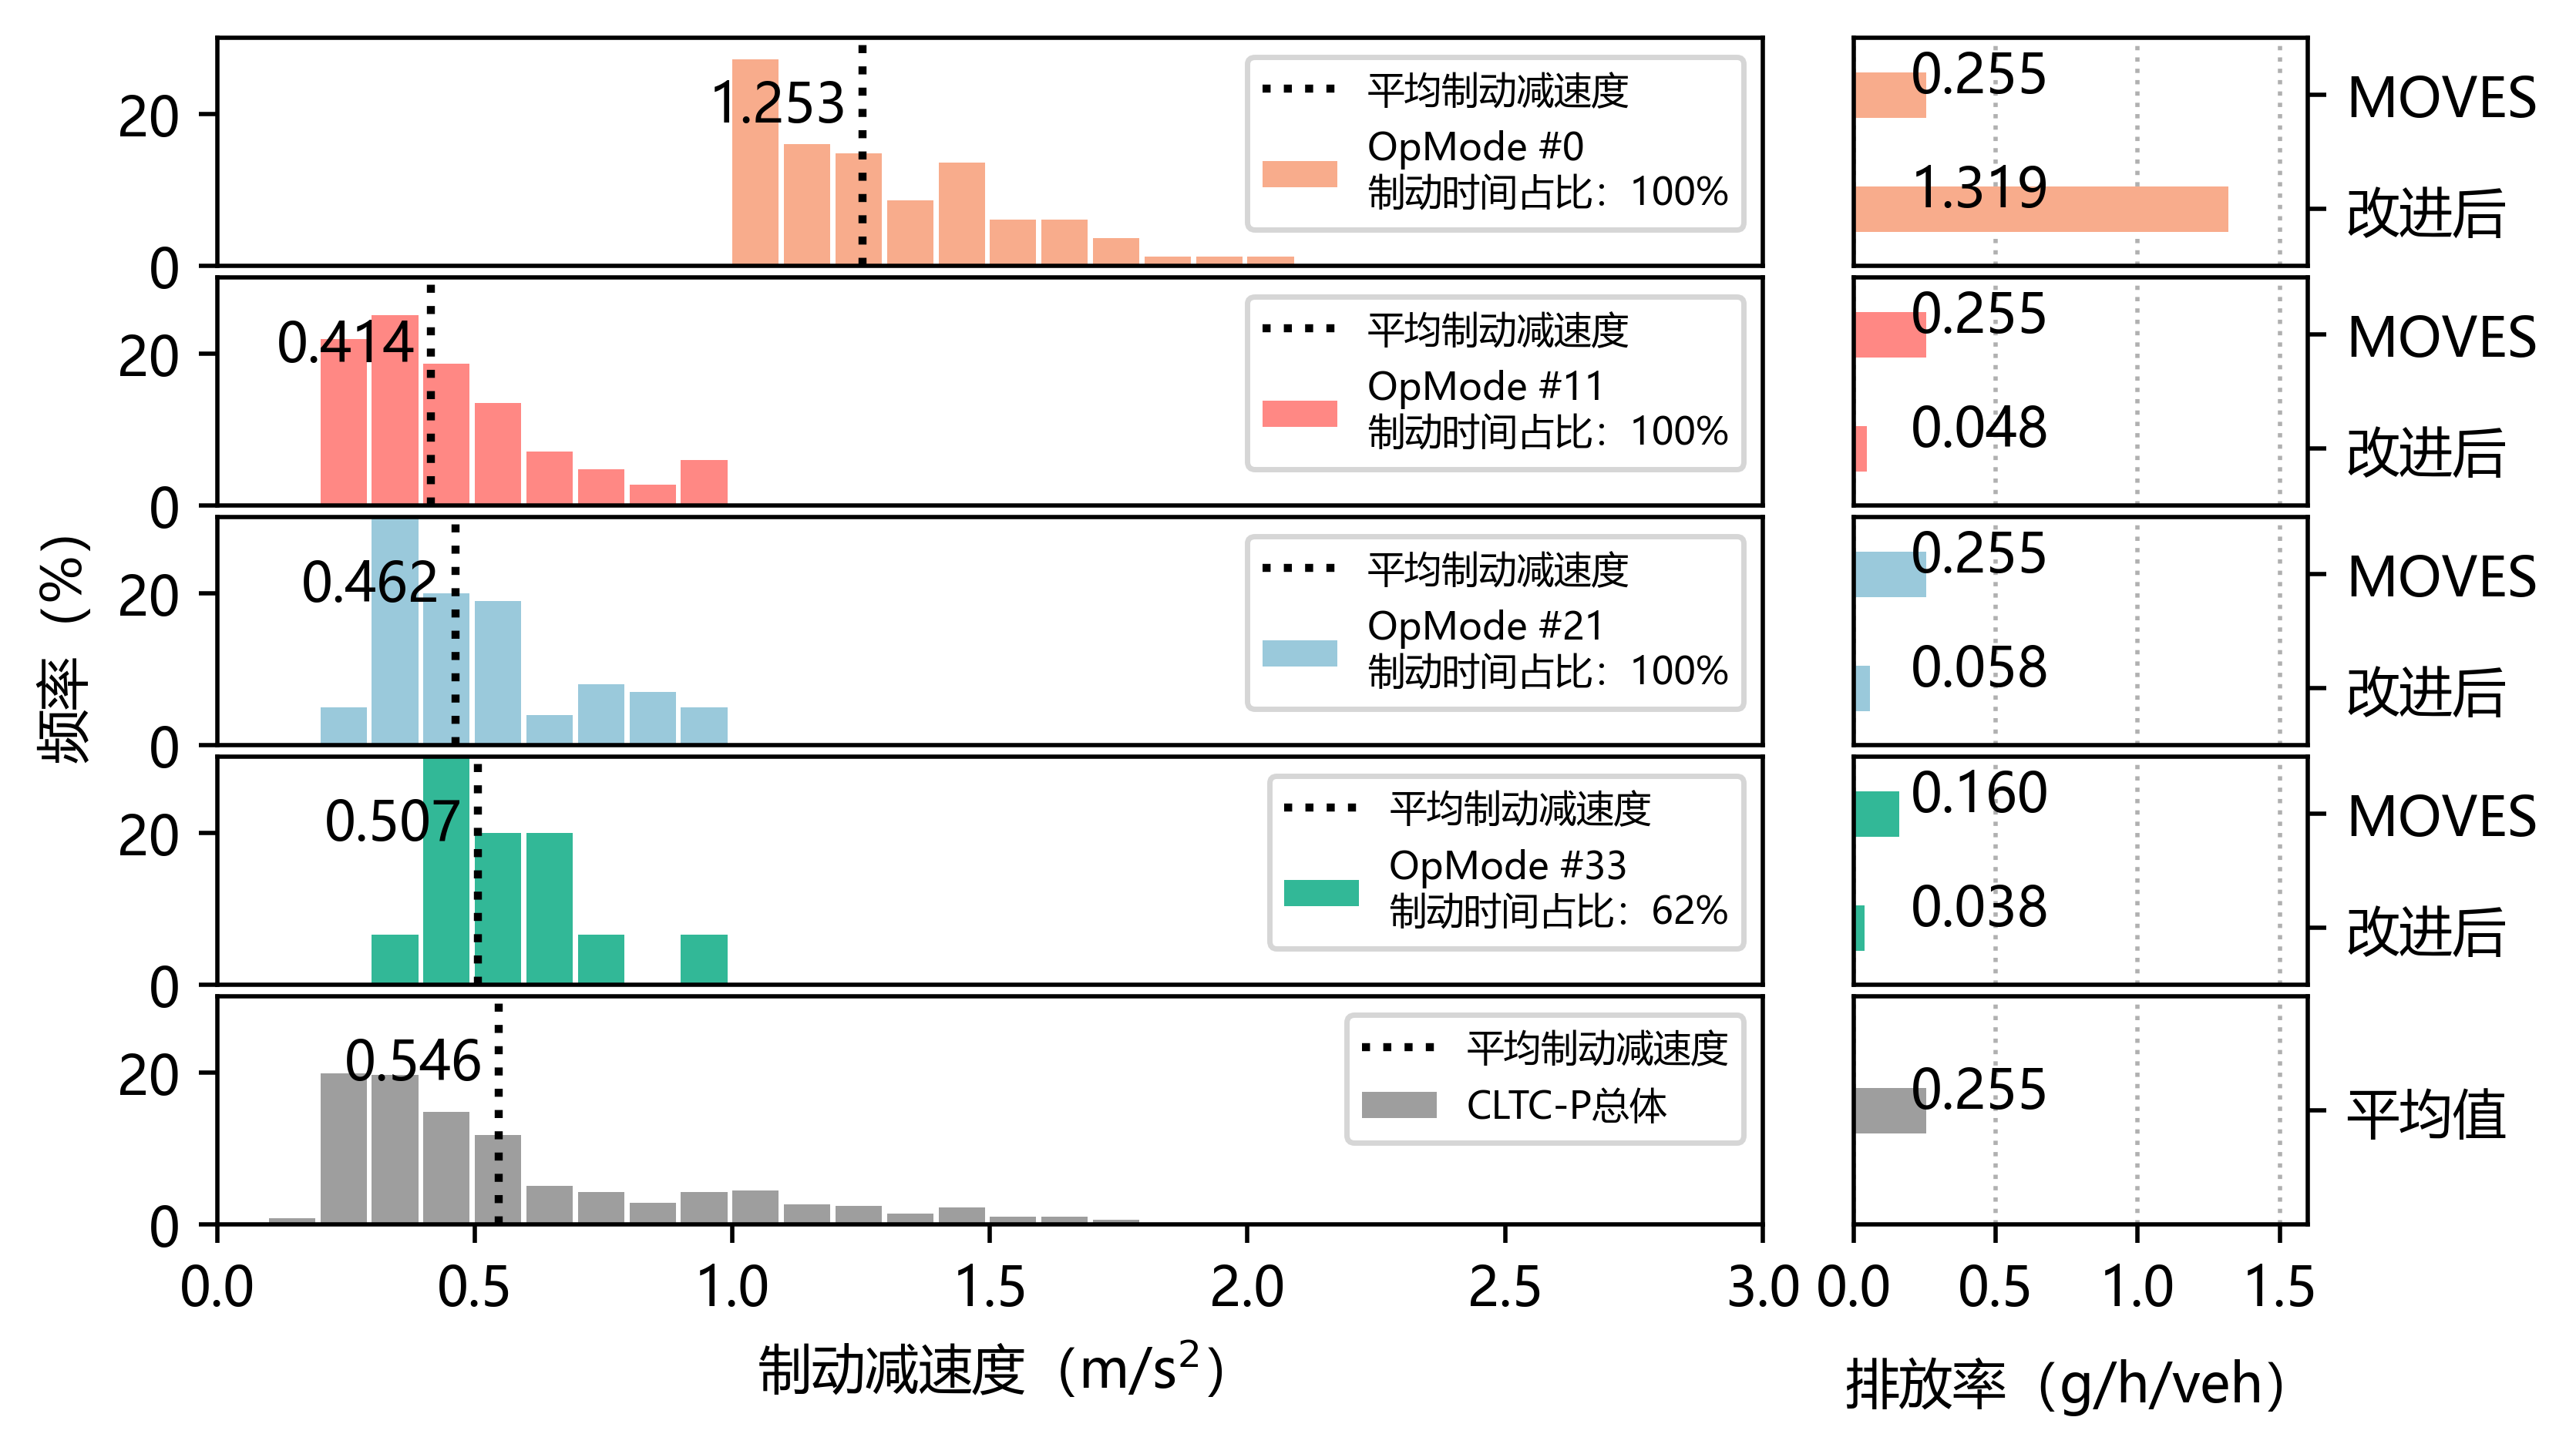

In [8]:
fig = plt.figure(figsize=(7,4))

ax1 = plt.subplot2grid((5,4), (0,0), colspan=3)  # 0-hist
ax2 = plt.subplot2grid((5,4), (1,0), colspan=3)  # 11-hist
ax3 = plt.subplot2grid((5,4), (2,0), colspan=3)  # 21-hist
ax4 = plt.subplot2grid((5,4), (3,0), colspan=3)  # 33-hist
ax5 = plt.subplot2grid((5,4), (4,0), colspan=3)  # all-hist

ax6 = plt.subplot2grid((5,4), (0,3))  # 0-bar
ax7 = plt.subplot2grid((5,4), (1,3))  # 11-bar
ax8 = plt.subplot2grid((5,4), (2,3))  # 21-bar
ax9 = plt.subplot2grid((5,4), (3,3))  # 33-bar
ax10 = plt.subplot2grid((5,4), (4,3))  # all-bar

# hist
decels = np.arange(-4.5, 0, 0.1)

ax1.bar(decels*-1, OpModesInfo_p.loc[0]['brakeDecelBinProp']*100, width=0.09, zorder=2, align='edge', color=ORANGE, label="OpMode #0\n制动时间占比：%.f%%" % (OpModesInfo_p.loc[0]['brakeFrac']*100))
avg_decel = sum(decels * OpModesInfo_p.loc[0]['brakeDecelBinProp'])*-1
ax1.vlines(avg_decel, 0, 100, zorder=2, color='k', linestyle=":", label="平均制动减速度")
ax1.text(avg_decel-0.03, 19, "%.3f" % avg_decel, zorder=2, ha='right', color='k')

ax2.bar(decels*-1, OpModesInfo_p.loc[11]['brakeDecelBinProp']*100, width=0.09, zorder=2, align='edge', color=PINK, label="OpMode #11\n制动时间占比：%.f%%" % (OpModesInfo_p.loc[11]['brakeFrac']*100))
avg_decel = sum(decels * OpModesInfo_p.loc[11]['brakeDecelBinProp'])*-1
ax2.vlines(avg_decel, 0, 100, zorder=2, color='k', linestyle=":", label="平均制动减速度")
ax2.text(avg_decel-0.03, 19, "%.3f" % avg_decel, zorder=2, ha='right', color='k')

ax3.bar(decels*-1, OpModesInfo_p.loc[21]['brakeDecelBinProp']*100, width=0.09, zorder=2, align='edge', color=LIGHTBLUE, label="OpMode #21\n制动时间占比：%.f%%" % (OpModesInfo_p.loc[21]['brakeFrac']*100))
avg_decel = sum(decels * OpModesInfo_p.loc[21]['brakeDecelBinProp'])*-1
ax3.vlines(avg_decel, 0, 100, zorder=2, color='k', linestyle=":", label="平均制动减速度")
ax3.text(avg_decel-0.03, 19, "%.3f" % avg_decel, zorder=2, ha='right', color='k')

ax4.bar(decels*-1, OpModesInfo_p.loc[33]['brakeDecelBinProp']*100, width=0.09, zorder=2, align='edge', color=DEEPGREEN, label="OpMode #33\n制动时间占比：%.f%%" % (OpModesInfo_p.loc[33]['brakeFrac']*100))
avg_decel = sum(decels * OpModesInfo_p.loc[33]['brakeDecelBinProp'])*-1
ax4.vlines(avg_decel, 0, 100, zorder=2, color='k', linestyle=":", label="平均制动减速度")
ax4.text(avg_decel-0.03, 19, "%.3f" % avg_decel, zorder=2, ha='right', color='k')

avg_decel_prop = sum(OpModesInfo_p['brakeDecelBinProp'] * OpModesInfo_p['brakeCount']) / sum(OpModesInfo_p['brakeCount'])
ax5.bar(decels*-1, avg_decel_prop*100, width=0.09, zorder=2, align='edge', color=GREY, label="CLTC-P总体")
avg_decel = sum(decels * avg_decel_prop)*-1
ax5.vlines(avg_decel, 0, 100, zorder=2, color='k', linestyle=":", label="平均制动减速度")
ax5.text(avg_decel-0.03, 19, "%.3f" % avg_decel, zorder=2, ha='right', color='k')

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim(0,3)
    ax.set_ylim(0, 30)
    ax.set_xticklabels([])
    ax.tick_params(axis='x', colors='none')
    ax.legend(fontsize=7)
# ax1.legend(fontsize=7, loc=2)
ax5.set_xlim(0, 3)
ax5.set_ylim(0, 30)
ax5.legend(fontsize=7)
# labels
ax3.set_ylabel("频率（%）", fontsize=10)
ax5.set_xlabel("制动减速度（m/s$^2$）", fontsize=10)


# ER comparison
ax6.barh(np.arange(0,2), OpModesInfo_p.loc[0][['ER[g/hr/veh]', 'ER_MOVES[g/hr/veh]']], height=0.4, zorder=2, color=ORANGE)
ax6.text(0.2, 0.9, "%.3f"%OpModesInfo_p.loc[0]['ER_MOVES[g/hr/veh]'], zorder=2, color='k', ha='left', va='bottom')
ax6.text(0.2, -0.1, "%.3f"%OpModesInfo_p.loc[0]['ER[g/hr/veh]'], zorder=2, color='k', ha='left',va='bottom')

ax7.barh(np.arange(0,2), OpModesInfo_p.loc[11][['ER[g/hr/veh]', 'ER_MOVES[g/hr/veh]']], height=0.4, zorder=2, color=PINK)
ax7.text(0.2, 0.9, "%.3f"%OpModesInfo_p.loc[11]['ER_MOVES[g/hr/veh]'], zorder=2, color='k', ha='left', va='bottom')
ax7.text(0.2, -0.1, "%.3f"%OpModesInfo_p.loc[11]['ER[g/hr/veh]'], zorder=2, color='k', ha='left',va='bottom')

ax8.barh(np.arange(0,2), OpModesInfo_p.loc[21][['ER[g/hr/veh]', 'ER_MOVES[g/hr/veh]']], height=0.4, zorder=2, color=LIGHTBLUE)
ax8.text(0.2, 0.9, "%.3f"%OpModesInfo_p.loc[21]['ER_MOVES[g/hr/veh]'], zorder=2, color='k', ha='left', va='bottom')
ax8.text(0.2, -0.1, "%.3f"%OpModesInfo_p.loc[21]['ER[g/hr/veh]'], zorder=2, color='k', ha='left',va='bottom')

ax9.barh(np.arange(0,2), OpModesInfo_p.loc[33][['ER[g/hr/veh]', 'ER_MOVES[g/hr/veh]']], height=0.4, zorder=2, color=DEEPGREEN)
ax9.text(0.2, 0.9, "%.3f"%OpModesInfo_p.loc[33]['ER_MOVES[g/hr/veh]'], zorder=2, color='k', ha='left', va='bottom')
ax9.text(0.2, -0.1, "%.3f"%OpModesInfo_p.loc[33]['ER[g/hr/veh]'], zorder=2, color='k', ha='left',va='bottom')

ER_avg = OpModesInfo_p.loc[0, 'ER_MOVES[g/hr/veh]'] / OpModesInfo_p.loc[0, 'brakeFrac']
ax10.barh(np.arange(0,1), ER_avg, height=0.2, zorder=2, color=GREY)
ax10.text(0.2, -0.05, "%.3f"%ER_avg, zorder=2, color='k', ha='left', va='bottom')

# set format
for ax in [ax6, ax7, ax8, ax9]:
    ax.set_xticks([0,0.5,1,1.5])
    ax.set_xticklabels([])
    ax.set_yticks([0,1])
    ax.set_yticklabels(['改进后', 'MOVES'])
    ax.set_ylim(-0.5,1.5)
    ax.grid(axis="x", linestyle=":", zorder=0)
    ax.yaxis.tick_right()
    # ax.spines['bottom'].set_color('none')
    ax.tick_params(axis='x', colors='none')
ax10.set_xticks([0,0.5,1,1.5])
ax10.set_yticks([0])
ax10.set_yticklabels(['平均值'])
ax10.set_ylim(-0.5,0.5)
ax10.grid(axis="x", linestyle=":", zorder=0)
ax10.yaxis.tick_right()
ax10.set_xlabel("排放率（g/h/veh）", fontsize=10, labelpad=7)

for ax in [ax6, ax7, ax8, ax9, ax10]:
    ax.set_xlim(0, 1.6)
plt.subplots_adjust(hspace=0.05)
plt.show()
